<a href="https://colab.research.google.com/github/claytonelbelTAMU/IPEC-638-Introduction-to-Data-Science/blob/main/project/ICPE_DS1_Spring_2025_Clayton_Elbel_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis of the Breast Cancer Diagnosis
###  ICPE 638 - Spring 2025

[Haoyu Niu](https://orcid.org/0000-0002-7052-8877), Texas A&M University.
Updated: Jan. 29, 2025.

**(30 Points)**

### **Dataset**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The separating plane described above was obtained using Multisurface Method-Tree (MSM-T)

##### Data Set Characteristics:

Attribute information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

### **Problem**

Please answer the following question in this Jupyter notebook.

1. Perform Exploratory Data Analysis on the data and highlight your insights.
   
2. What are the most important features in the dataset? How did you determine this?
   
3. What kind of supervised machine learning model would you use to classify a diagnosis? Please justify your answer.

## Download and Process Dataset

Please don't change this section!

You can directly use the dataframe `df` in your code.

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer_data = load_breast_cancer()

print(breast_cancer_data["DESCR"])
df=pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

df

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [1]:
## Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Set plot style and size
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [8]:
# Add the target variable (diagnosis)
from sklearn.datasets import load_breast_cancer # Importing the necessary function here
breast_cancer_data = load_breast_cancer() # Defining breast_cancer_data in the current cell
df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)  # Define df here
df['diagnosis'] = breast_cancer_data.target
df['diagnosis'] = df['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

In [9]:
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")
print(f"Class distribution:\n{df['diagnosis'].value_counts()}")
print(f"Class distribution (percentage):\n{df['diagnosis'].value_counts(normalize=True) * 100}")

Dataset shape: (569, 31)
Number of features: 30
Number of samples: 569
Class distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64
Class distribution (percentage):
diagnosis
Benign       62.741652
Malignant    37.258348
Name: proportion, dtype: float64


## Exploratory Data Analysis (EDA)

### Statistical Analysis


In [16]:
# Basic statistical analysis
print("\n=== Basic Statistics of the Dataset ===")
print(df.describe().T)



=== Basic Statistics of the Dataset ===
                         count        mean         std         min  \
mean radius              569.0   14.127292    3.524049    6.981000   
mean texture             569.0   19.289649    4.301036    9.710000   
mean perimeter           569.0   91.969033   24.298981   43.790000   
mean area                569.0  654.889104  351.914129  143.500000   
mean smoothness          569.0    0.096360    0.014064    0.052630   
mean compactness         569.0    0.104341    0.052813    0.019380   
mean concavity           569.0    0.088799    0.079720    0.000000   
mean concave points      569.0    0.048919    0.038803    0.000000   
mean symmetry            569.0    0.181162    0.027414    0.106000   
mean fractal dimension   569.0    0.062798    0.007060    0.049960   
radius error             569.0    0.405172    0.277313    0.111500   
texture error            569.0    1.216853    0.551648    0.360200   
perimeter error          569.0    2.866059    2.0

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")



Missing values in the dataset:
No missing values found


### Data Visualization


#### Class Distribution

<ipython-input-17-8bf7bbbc2cae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=df, palette='Set1')


Text(0, 0.5, 'Count')

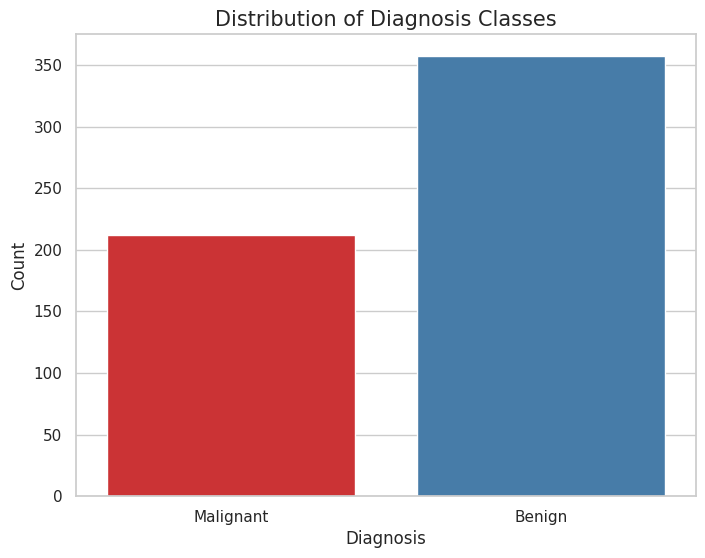

In [17]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set1')
plt.title('Distribution of Diagnosis Classes', fontsize=15)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)

The dataset shows a class imbalance with significantly more benign cases than malignant cases, which may affect model training.

In [20]:
# Add count and percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, f'{height} ({height/len(df)*100:.1f}%)',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

#### Feature Distributions

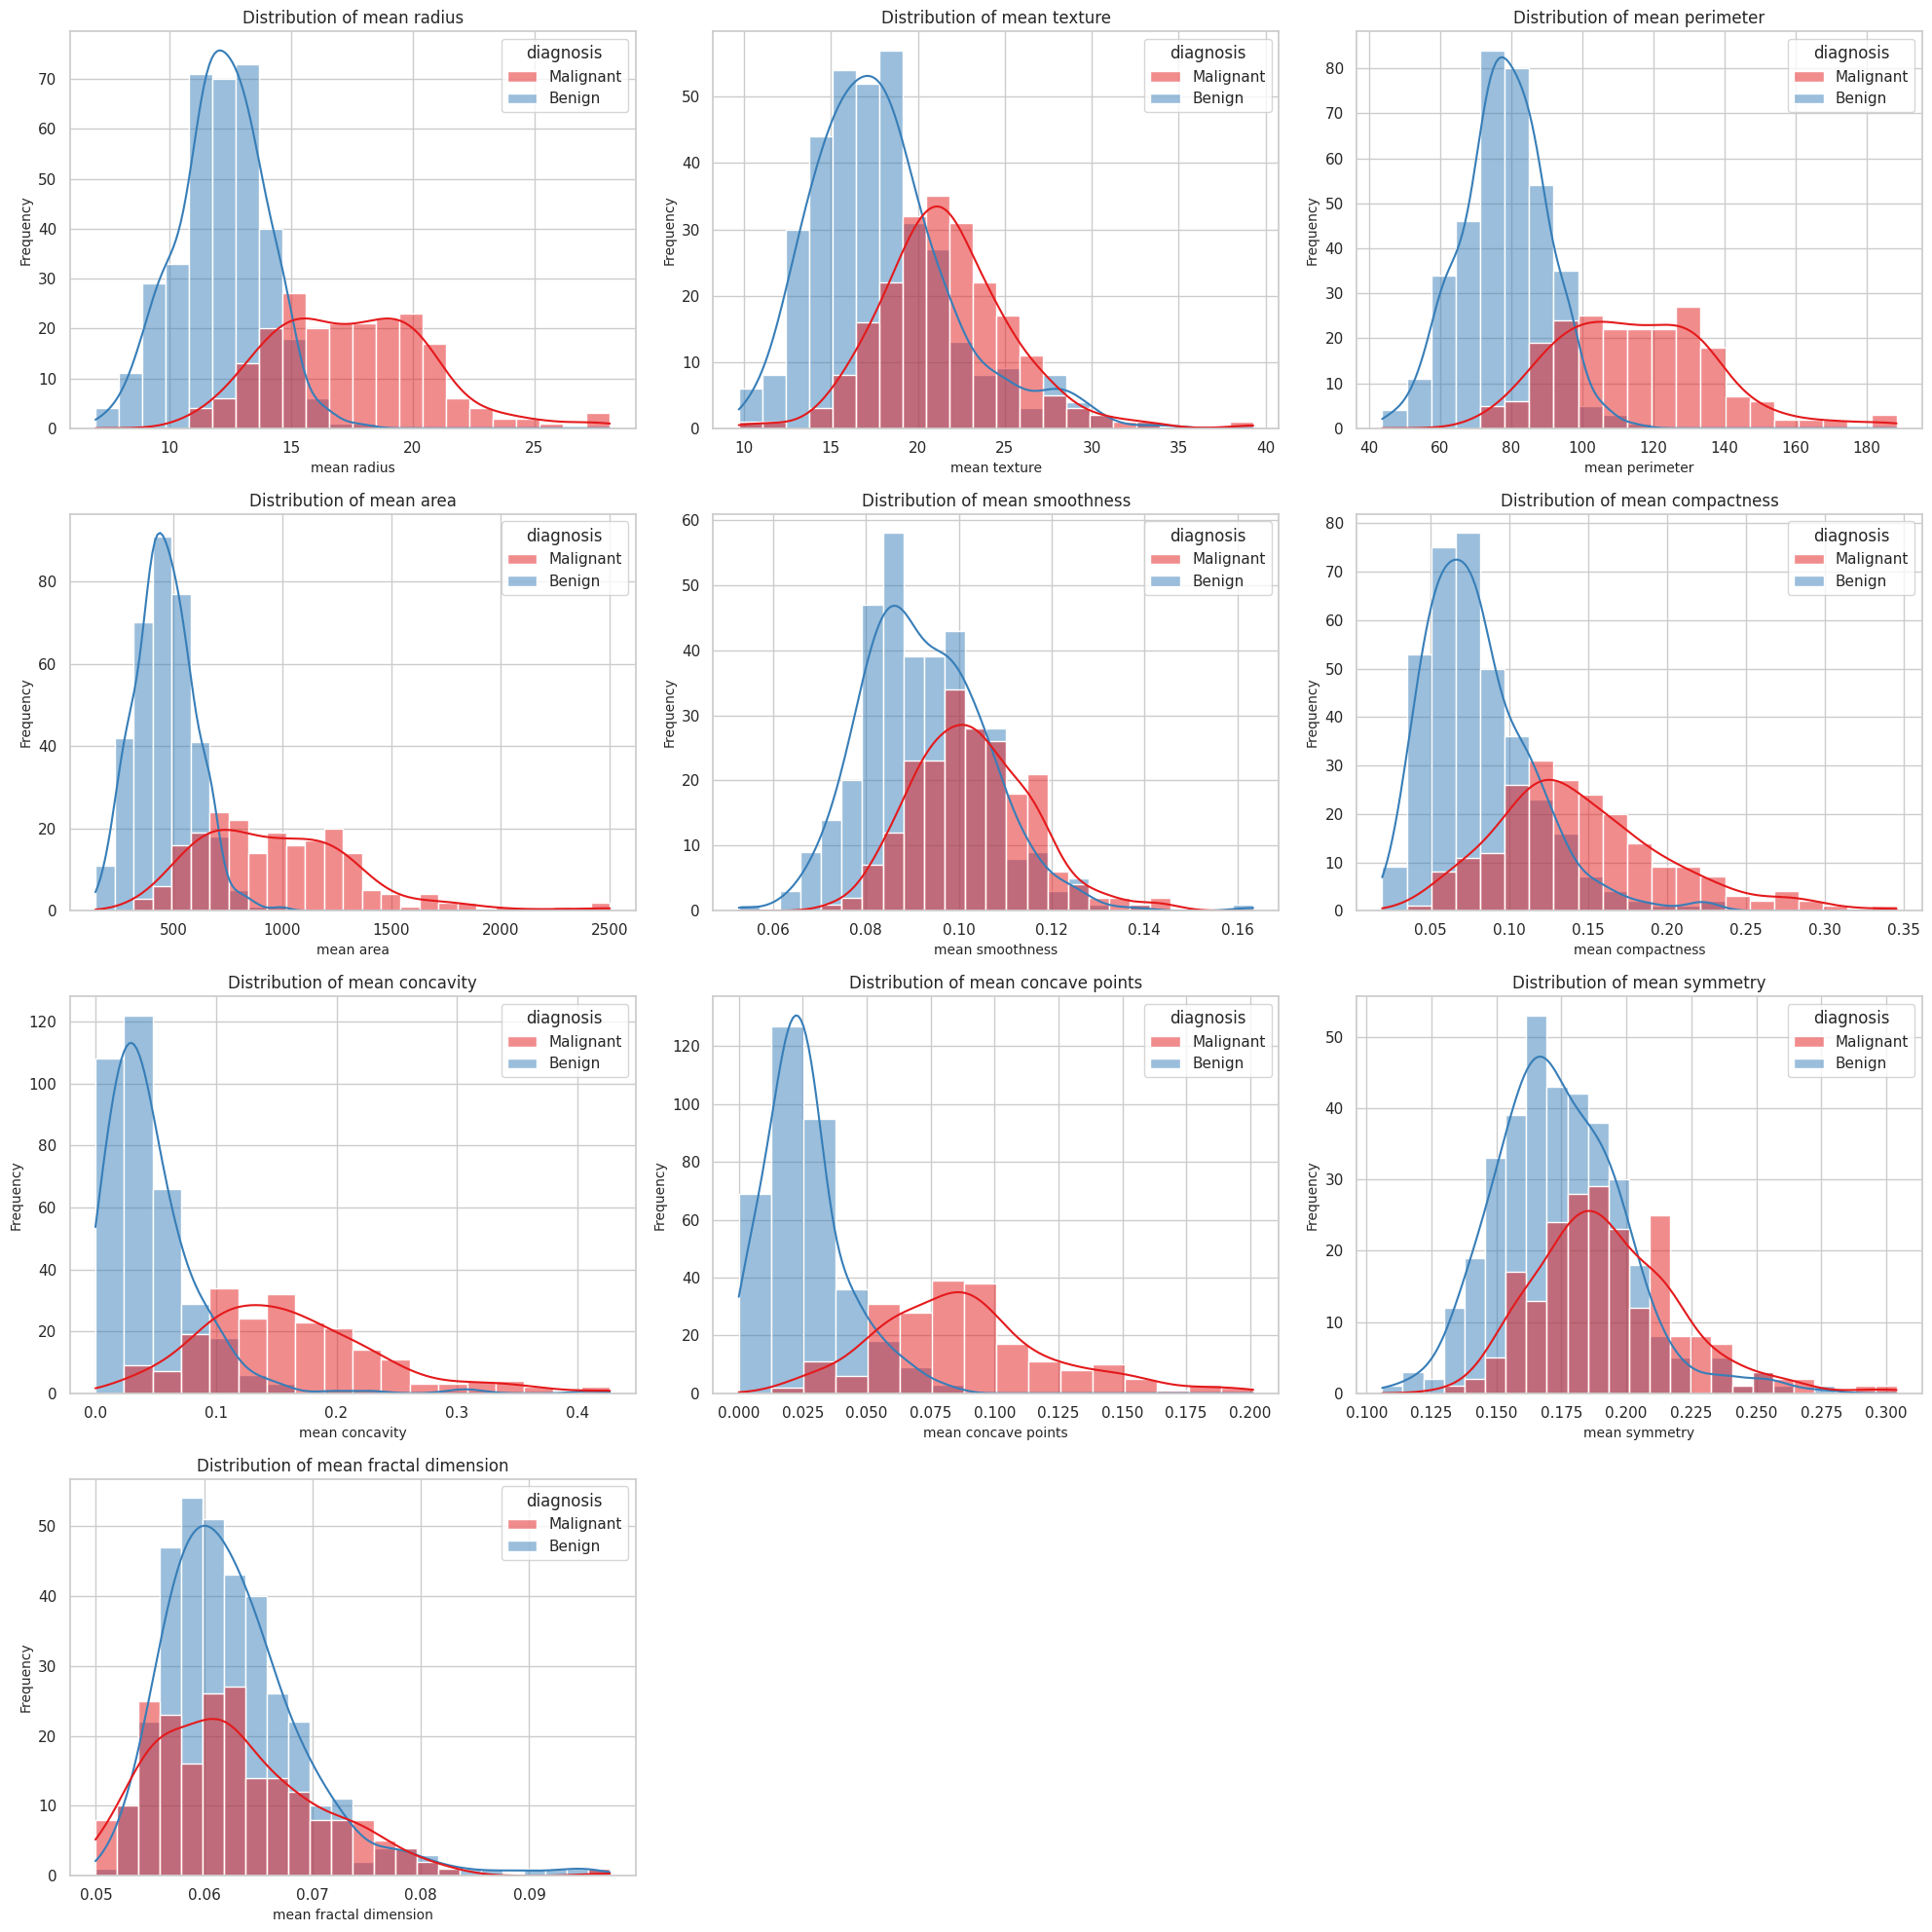

In [21]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(breast_cancer_data.feature_names[:10]):  # First 10 mean features
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='Set1')
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.tight_layout()
plt.show()

#### Box Plots to Identify Outliers


<ipython-input-25-d56d1bd6a384>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-25-d56d1bd6a384>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-25-d56d1bd6a384>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-25-d56d1bd6a384>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

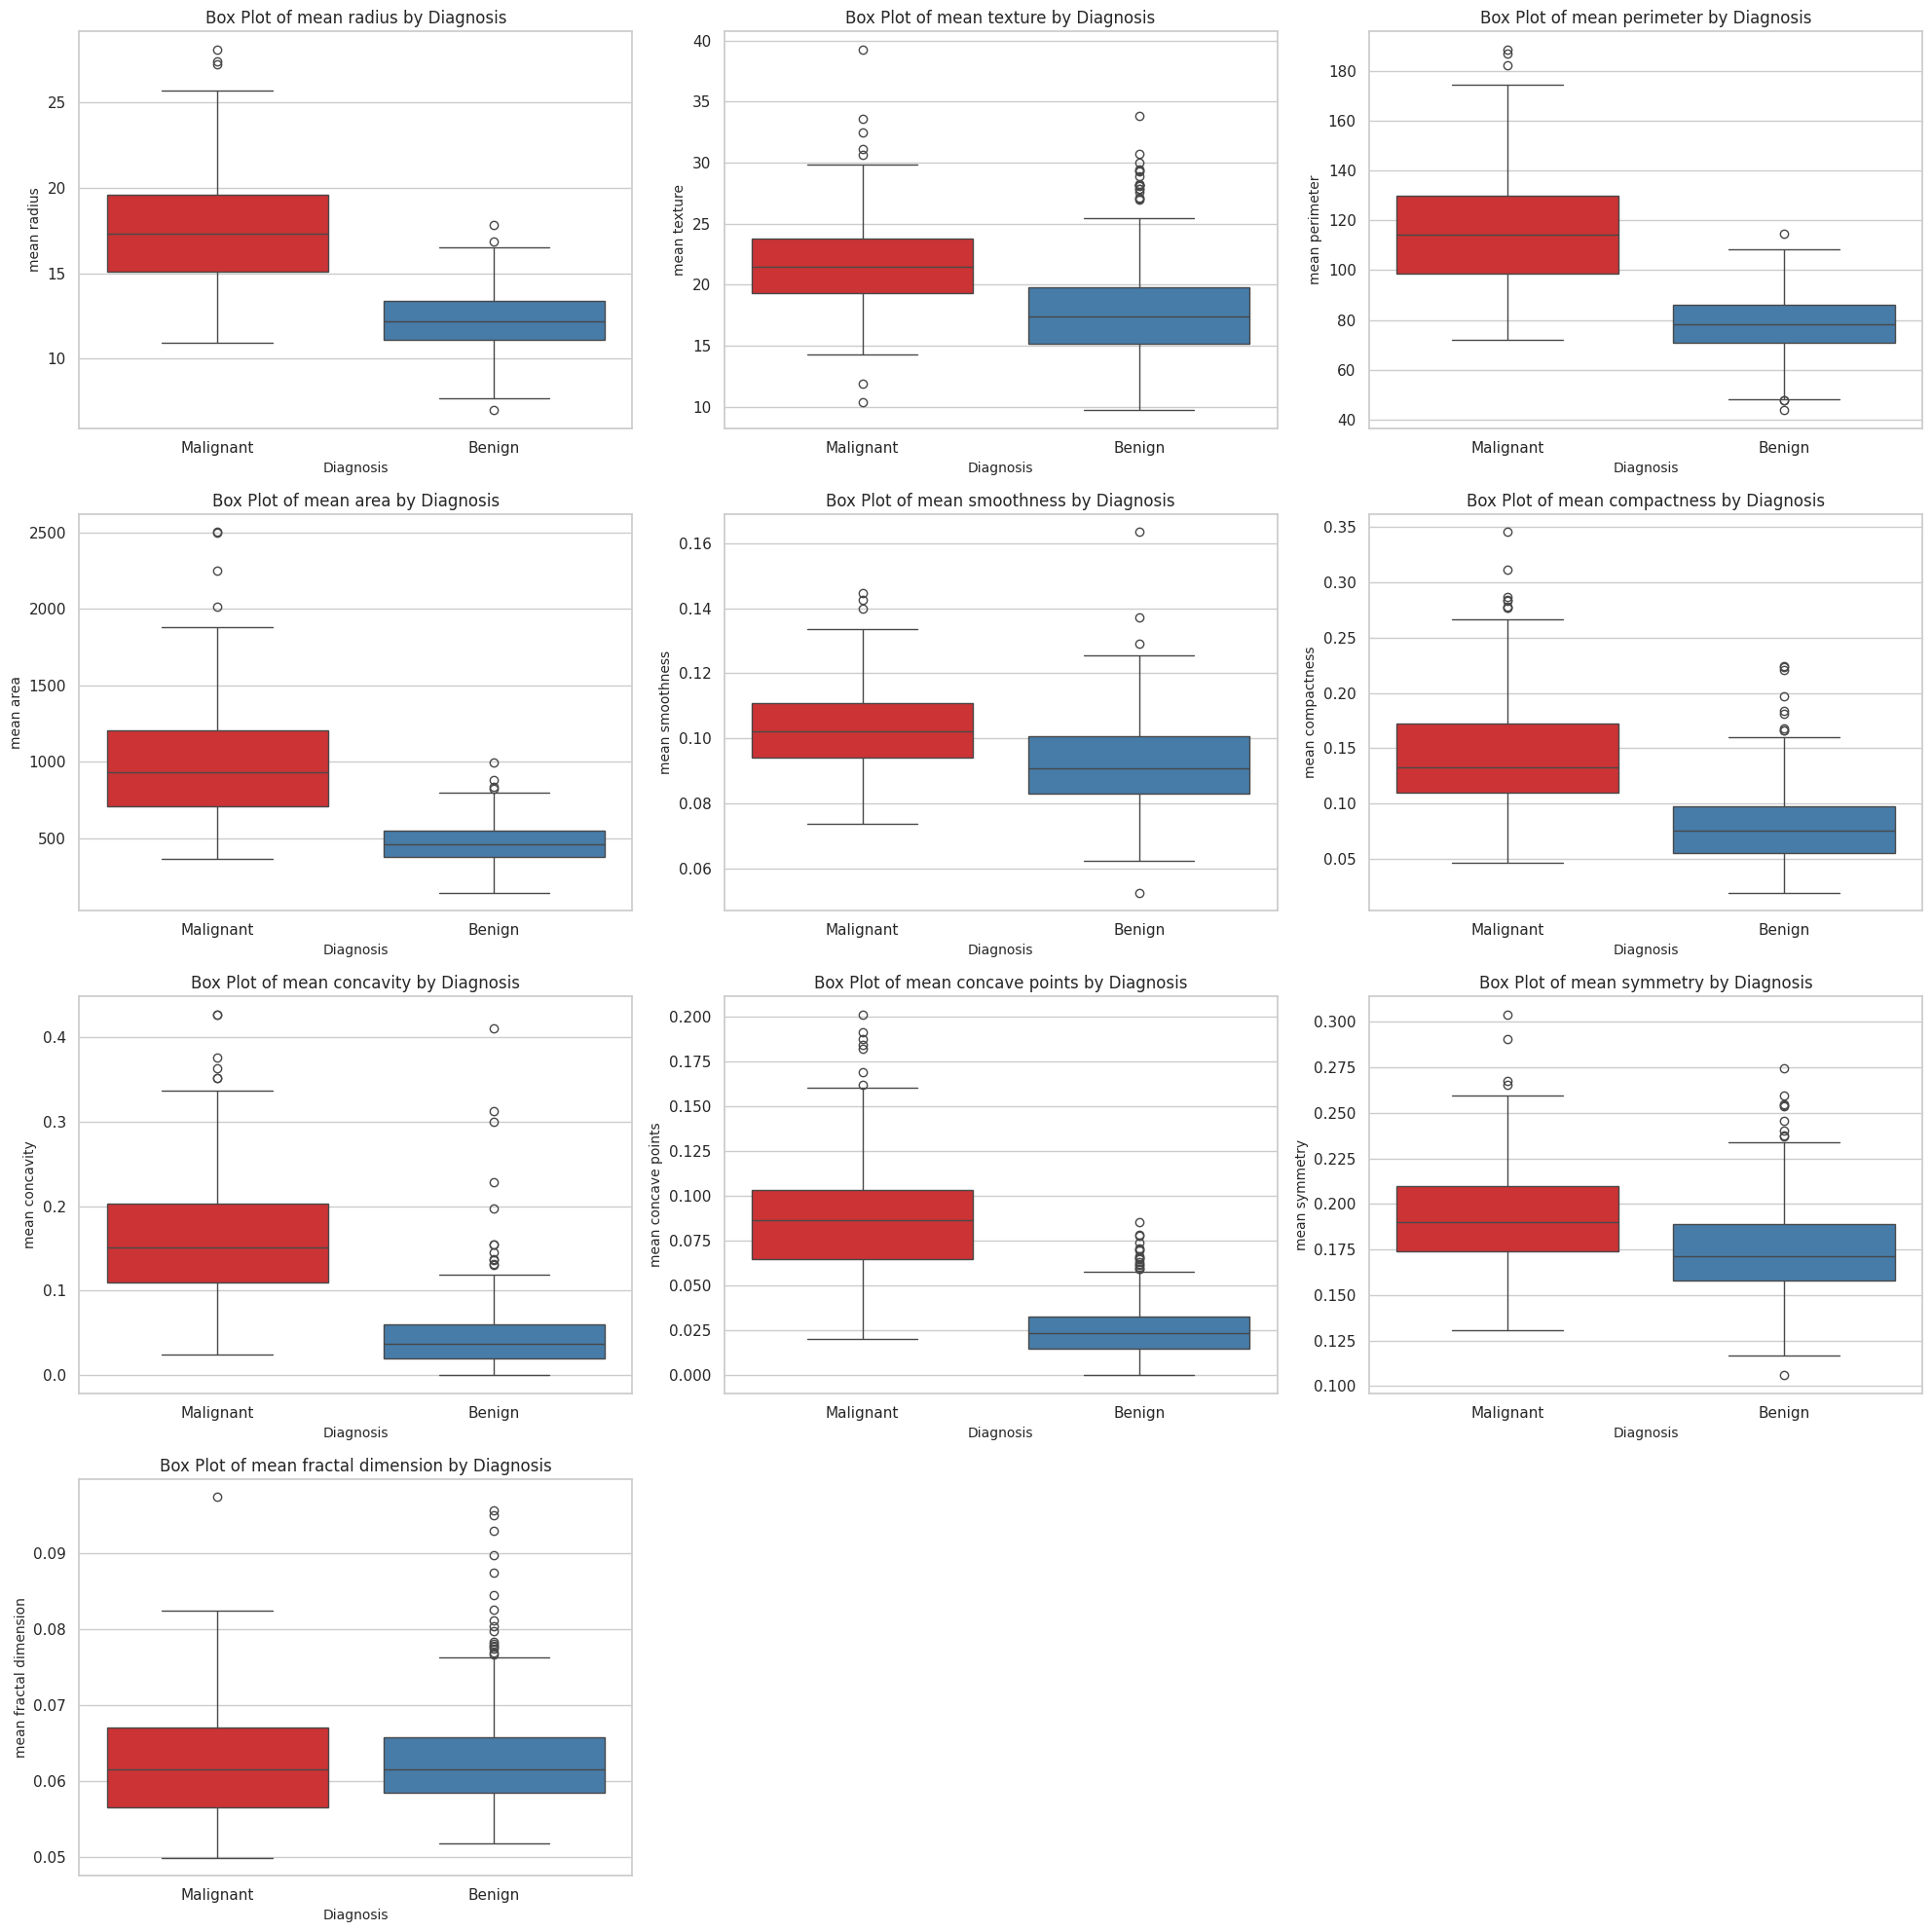

In [25]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(breast_cancer_data.feature_names[:10]):  # First 10 mean features
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set1')
    plt.title(f'Box Plot of {feature} by Diagnosis', fontsize=12)
    plt.xlabel('Diagnosis', fontsize=10)
    plt.ylabel(feature, fontsize=10)
    plt.tight_layout()
plt.show()

**Key observations from these box plots:**

1. **Size metrics strongly differentiate tumor types:** Mean radius, perimeter, and area show clear separation between malignant and benign tumors, with malignant tumors having significantly larger measurements.

2. **Shape irregularity indicates malignancy:** Mean concavity and concave points demonstrate that malignant cells typically have more irregular borders and indentations.

#### Correlation Analysis

In [26]:
# Get only the feature columns (exclude diagnosis)
features_df = df.drop('diagnosis', axis=1)
# Calculate correlation matrix
correlation_matrix = features_df.corr()

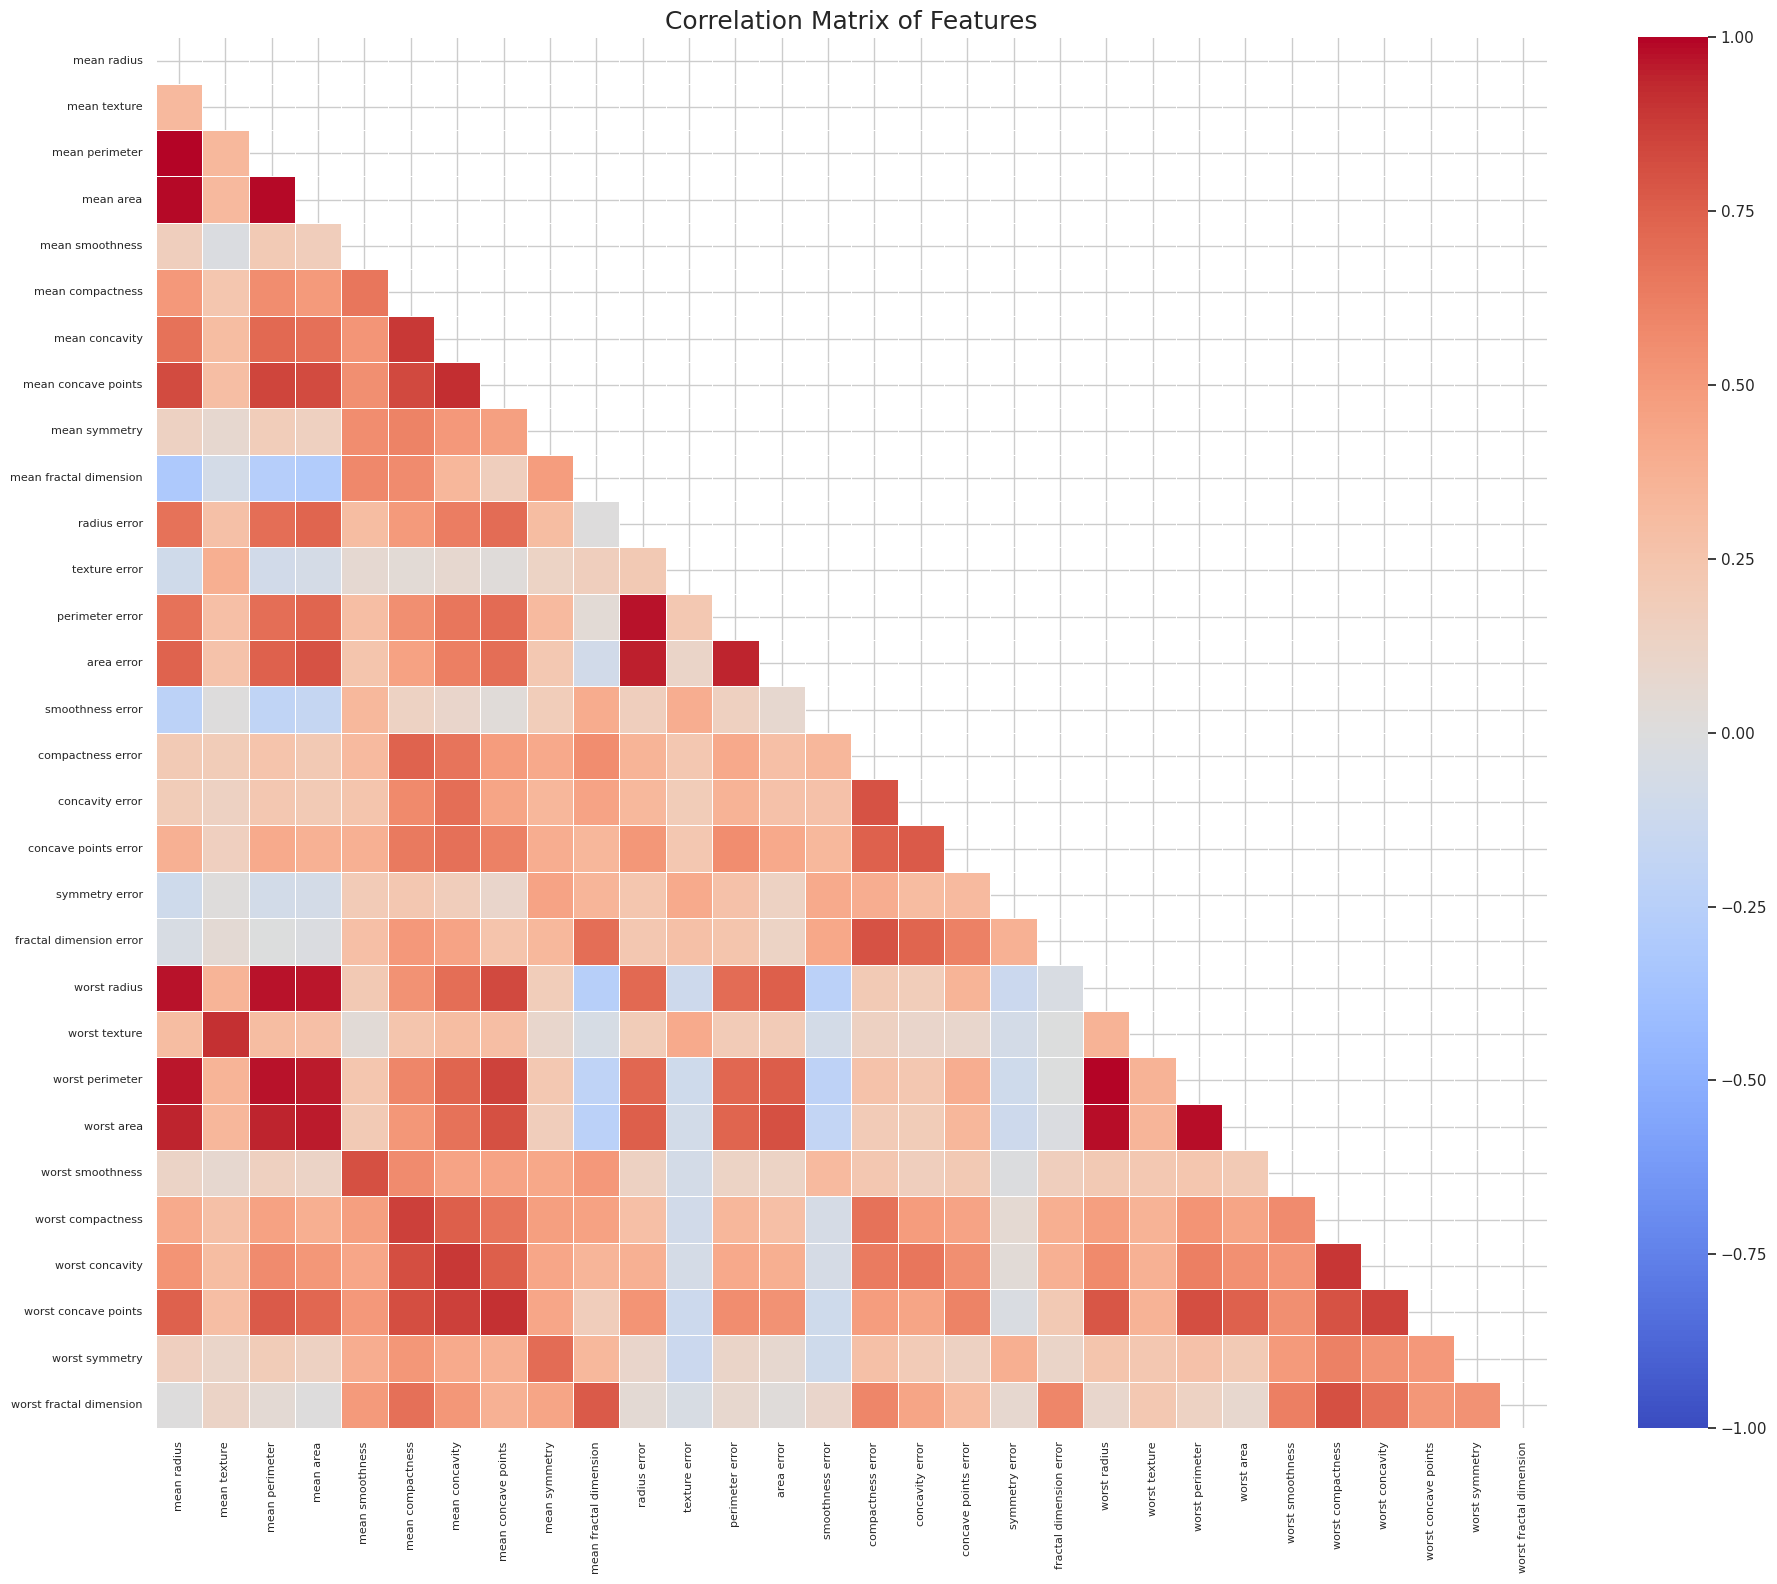

In [27]:
# Visualize correlation matrix
plt.figure(figsize=(20, 16))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5,
            vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix of Features', fontsize=18)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Related features show strong correlations, indicating dimensionality reduction would be beneficial.

#### Identify Highly Correlated Features (absolute correlation > 0.9)

In [28]:
high_corr = pd.DataFrame(correlation_matrix.unstack().sort_values(ascending=False))
high_corr = high_corr[high_corr[0] < 1]  # Remove self-correlation (always 1)
high_corr = high_corr[high_corr[0] > 0.9]  # Keep only high correlations
high_corr.reset_index(inplace=True)
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("\n=== Highly Correlated Features (> 0.9) ===")
print(high_corr)


=== Highly Correlated Features (> 0.9) ===
               Feature 1             Feature 2  Correlation
0         mean perimeter           mean radius     0.997855
1            mean radius        mean perimeter     0.997855
2        worst perimeter          worst radius     0.993708
3           worst radius       worst perimeter     0.993708
4            mean radius             mean area     0.987357
5              mean area           mean radius     0.987357
6              mean area        mean perimeter     0.986507
7         mean perimeter             mean area     0.986507
8             worst area          worst radius     0.984015
9           worst radius            worst area     0.984015
10       worst perimeter            worst area     0.977578
11            worst area       worst perimeter     0.977578
12          radius error       perimeter error     0.972794
13       perimeter error          radius error     0.972794
14       worst perimeter        mean perimeter     0.970

Many features have correlations above 0.9 (41 features), particularly among size-related measurements (radius, perimeter, area) and between mean and worst measures of the same feature.

#### # Pair Plot for Selected Features

<Figure size 1500x1000 with 0 Axes>

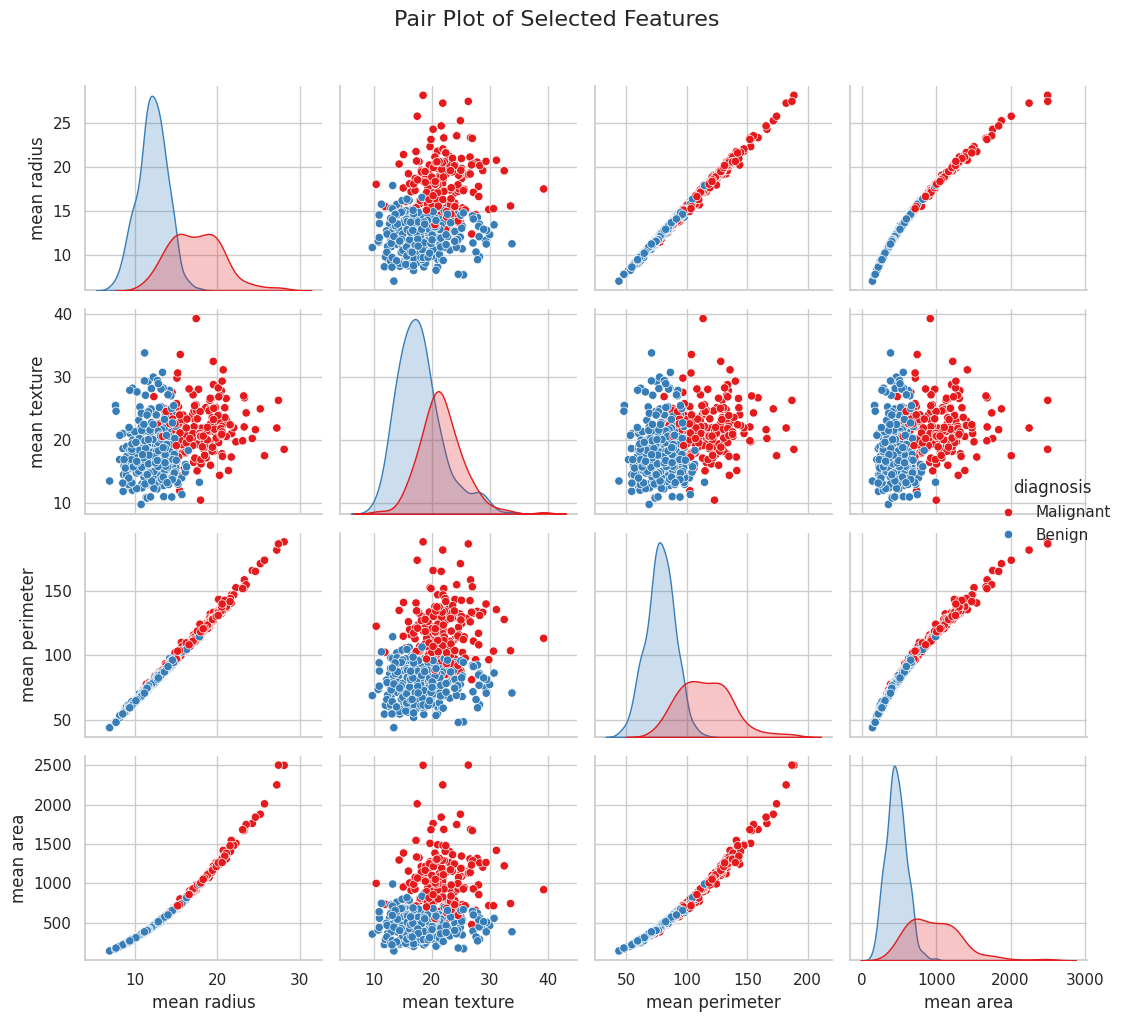

In [29]:
# Select some interesting features for visualization
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'diagnosis']
plt.figure(figsize=(15, 10))
sns.pairplot(df[selected_features], hue='diagnosis', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


The pair plot reveals that size measurements (radius, perimeter, area) are strongly correlated and effectively separate malignant from benign tumors, while texture shows less clear separation between the diagnosis groups.

#### PCA for Dimensionality Reduction and Visualization

In [32]:
# Standardize the features
X = features_df.values
X_scaled = StandardScaler().fit_transform(X)

In [33]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [34]:
# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis']

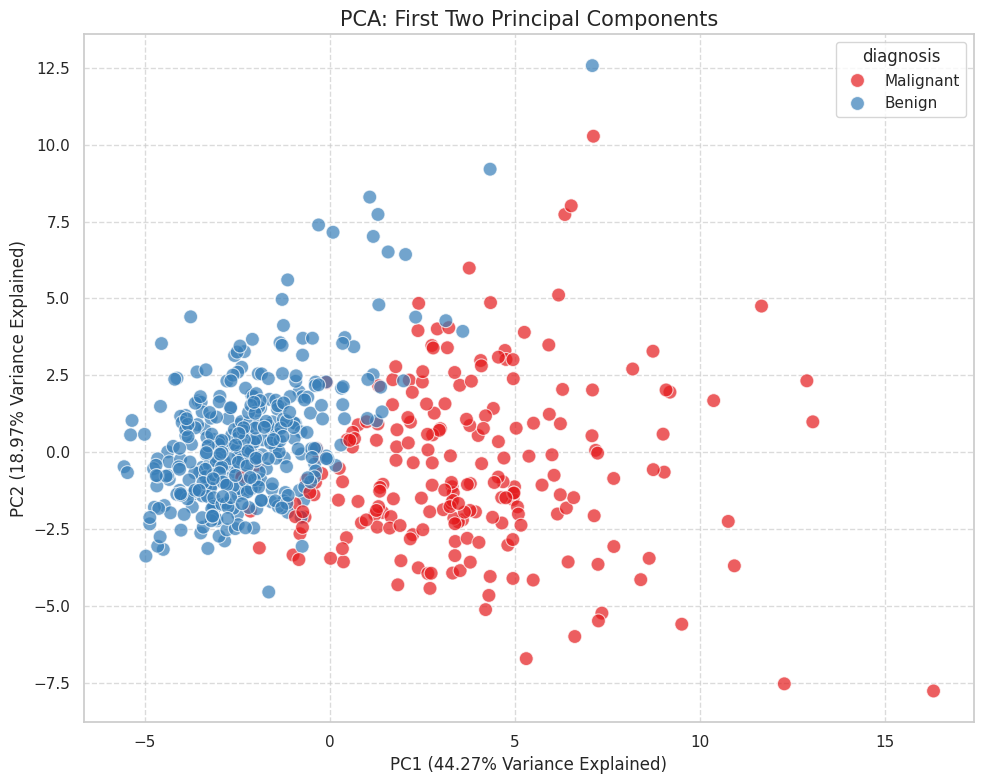

In [35]:
# Visualize the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA: First Two Principal Components', fontsize=15)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance Explained)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance Explained)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The PCA visualization shows good separation between malignant and benign tumors using just two principal components, with PC1 (44.27% variance) clearly distinguishing between the classes as malignant tumors tend toward positive PC1 values while benign tumors cluster in the negative PC1 region.

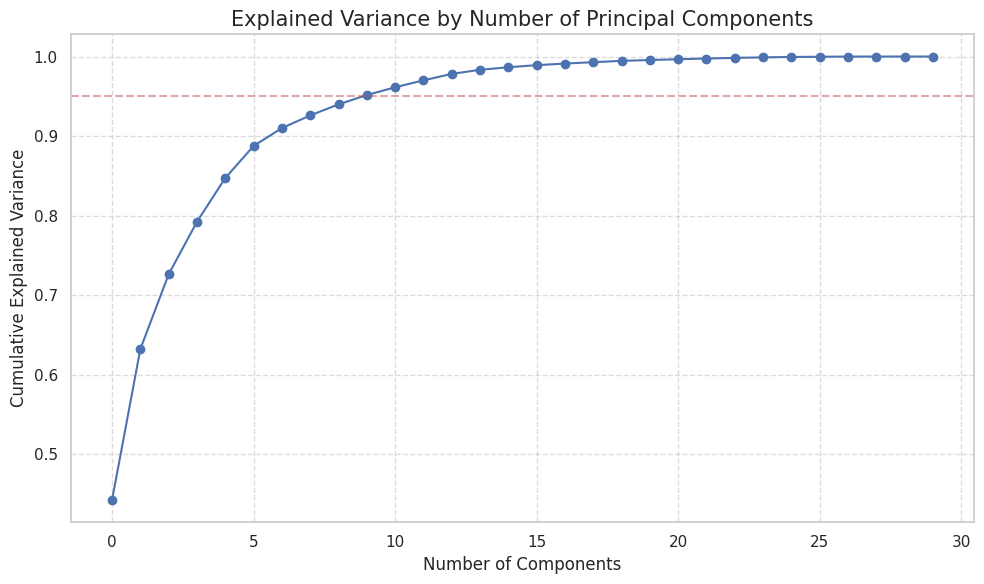

In [36]:
# Calculate and visualize the explained variance ratio
plt.figure(figsize=(10, 6))
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by Number of Principal Components', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The explained variance curve demonstrates that dimensionality reduction is highly effective for this dataset, with approximately 7-8 components capturing over 95% of the total variance (the red dashed line), suggesting that the original 30 features contain considerable redundancy.

#### Feature Means by Diagnosis Group


In [38]:
grouped_means = df.groupby('diagnosis').mean()
diff_percentage = ((grouped_means.loc['Malignant'] - grouped_means.loc['Benign']) /
                   grouped_means.loc['Benign'] * 100).abs().sort_values(ascending=False)


In [39]:
print("\n=== Top 10 Features with Largest Percentage Difference Between Groups ===")
print(diff_percentage.head(10))


=== Top 10 Features with Largest Percentage Difference Between Groups ===
mean concavity          249.072995
area error              243.846204
mean concave points     242.141814
worst concavity         171.060959
worst area              154.479826
worst concave points    144.796717
perimeter error         116.161737
radius error            114.403514
mean area               111.408198
worst compactness       105.189070
dtype: float64


#### Violin Plots for the Top Differentiating Features

<ipython-input-40-7009a11bd69a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-40-7009a11bd69a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-40-7009a11bd69a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set1')
<ipython-input-40-7009a11bd69a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

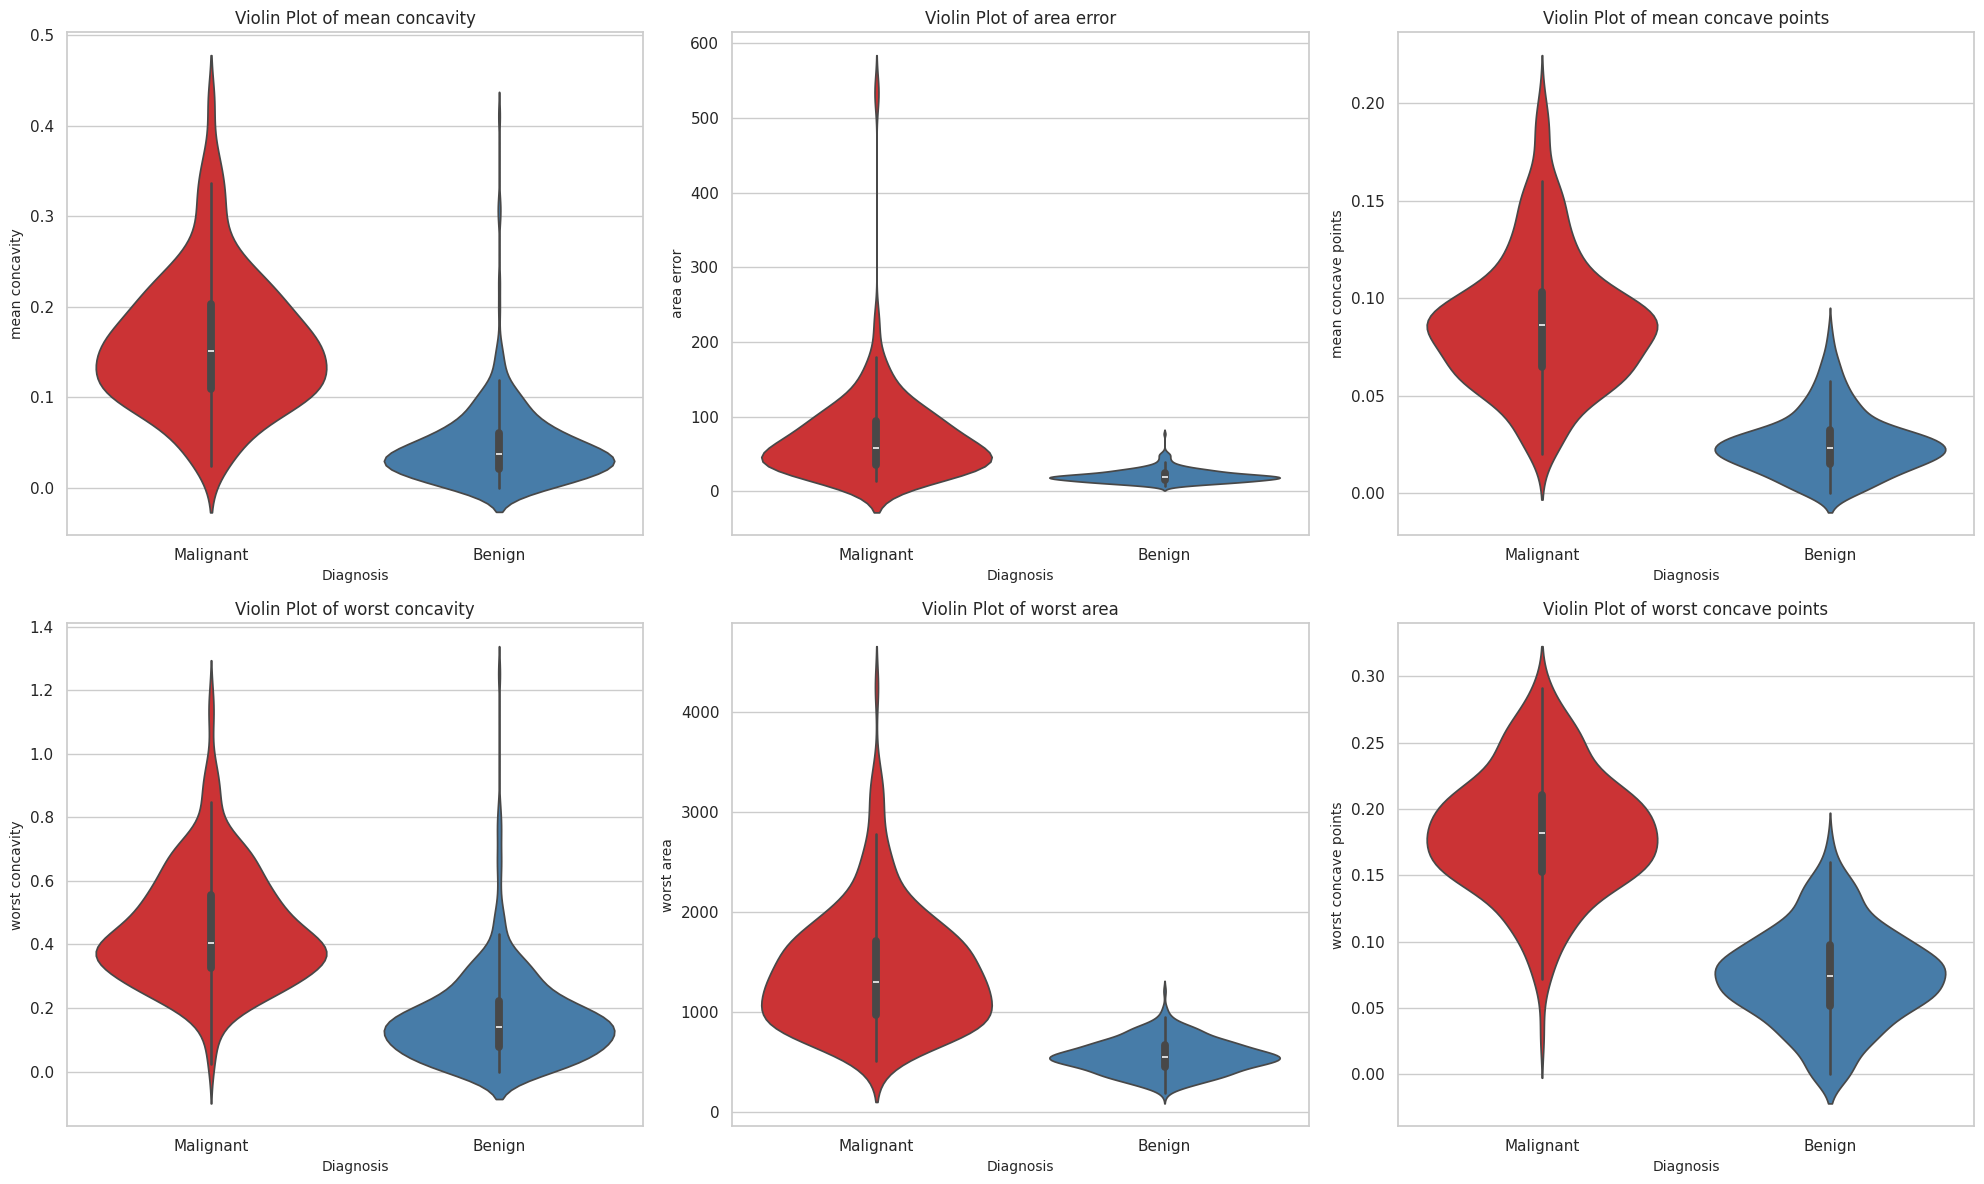

In [40]:
top_features = diff_percentage.head(6).index.tolist()
plt.figure(figsize=(20, 12))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set1')
    plt.title(f'Violin Plot of {feature}', fontsize=12)
    plt.xlabel('Diagnosis', fontsize=10)
    plt.ylabel(feature, fontsize=10)
plt.tight_layout()
plt.show()

The distributions show clear separation between the two diagnosis groups, particularly for concavity measures and area metrics, with minimal overlap in several features.

### Summary of EDA Insights


1. **Class Distribution**: The dataset is imbalanced with more Benign than Malignant cases.
2. **Feature Correlations**: Several features show high correlation, suggesting potential for dimensionality reduction.
3. **Group Differences**: Malignant tumors generally have higher values for radius, perimeter, area, and concavity measures.
4. **Separation**: PCA reveals good separation between the two classes even with just two components.
5. **Dimensionality**: The high correlation between features suggests redundancy in the data.

## Feature Importance Analysis


In [49]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import pointbiserialr, ttest_ind
import shap

In [50]:
# Add the target variable (diagnosis)
df['diagnosis'] = breast_cancer_data.target
df['diagnosis_binary'] = df['diagnosis']  # Keep a binary version for correlation
df['diagnosis'] = df['diagnosis'].map({0: 'Malignant', 1: 'Benign'})

# Separate features and target
X = df.drop(['diagnosis', 'diagnosis_binary'], axis=1)
y = df['diagnosis_binary']
feature_names = X.columns

### Correlation with Diagnosis

In [51]:
# Import the necessary function
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation with diagnosis
correlation_results = []
for feature in feature_names:
    corr, p_value = pointbiserialr(y, X[feature])
    correlation_results.append({
        'Feature': feature,
        'Correlation': corr,
        'P-value': p_value
    })

correlation_df = pd.DataFrame(correlation_results)
correlation_df = correlation_df.sort_values('Correlation', key=abs, ascending=False)

print("=== Top 10 Features by Correlation with Diagnosis ===")
print(correlation_df.head(10))


=== Top 10 Features by Correlation with Diagnosis ===
                 Feature  Correlation        P-value
27  worst concave points    -0.793566  1.969100e-124
22       worst perimeter    -0.782914  5.771397e-119
7    mean concave points    -0.776614  7.101150e-116
20          worst radius    -0.776454  8.482292e-116
2         mean perimeter    -0.742636  8.436251e-101
23            worst area    -0.733825   2.828848e-97
0            mean radius    -0.730029   8.465941e-96
3              mean area    -0.708984   4.734564e-88
6         mean concavity    -0.696360   9.966556e-84
26       worst concavity    -0.659610   2.464664e-72


In [52]:
# Visualize the correlations
plt.figure(figsize=(12, 10))
top_corr_features = correlation_df.head(15)['Feature'].values
corr_values = correlation_df.head(15)['Correlation'].values

<Figure size 1200x1000 with 0 Axes>

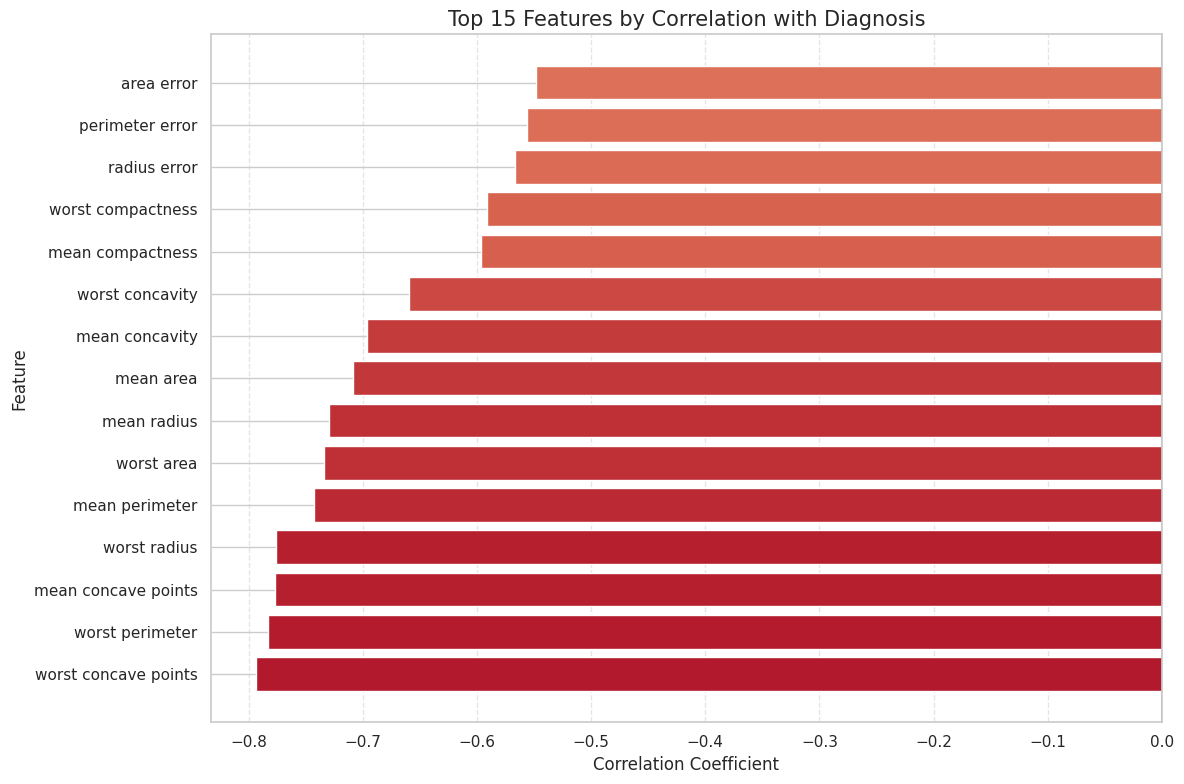

In [53]:
# Create a horizontal bar plot
plt.barh(top_corr_features, corr_values, color=plt.cm.RdBu(np.interp(corr_values, [-1, 1], [0, 1])))
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Top 15 Features by Correlation with Diagnosis', fontsize=15)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph shows that concavity-related features (worst and mean concave points) and size-related features (worst perimeter, worst radius, mean perimeter) have the strongest negative correlations with benign tumors, with coefficients below -0.7. This confirms our EDA findings that these metrics are most strongly associated with malignancy and likely to be important predictors in a classification model.

### Statistical Tests Between Groups

In [58]:
# Perform t-tests between malignant and benign groups
t_test_results = []
for feature in feature_names:
    # Get values for each group
    benign_values = df[df['diagnosis'] == 'Benign'][feature]
    malignant_values = df[df['diagnosis'] == 'Malignant'][feature]

     # Perform t-test
    t_stat, p_value = ttest_ind(malignant_values, benign_values, equal_var=False)

    # Calculate effect size (Cohen's d)
    mean_diff = malignant_values.mean() - benign_values.mean()
    pooled_std = np.sqrt((malignant_values.std()**2 + benign_values.std()**2) / 2)
    effect_size = mean_diff / pooled_std

    t_test_results.append({
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_value,
        "Cohen's d": effect_size})

In [59]:
t_test_df = pd.DataFrame(t_test_results)
t_test_df = t_test_df.sort_values("Cohen's d", key=abs, ascending=False)

print("\n=== Top 10 Features by Effect Size (Cohen's d) ===")
print(t_test_df.head(10))


=== Top 10 Features by Effect Size (Cohen's d) ===
                 Feature  T-statistic       P-value  Cohen's d
27  worst concave points    29.117659  1.061454e-96   2.604476
22       worst perimeter    25.332210  1.032730e-72   2.371866
7    mean concave points    24.844810  3.127316e-71   2.325082
20          worst radius    24.829745  3.556557e-71   2.323756
2         mean perimeter    22.935314  1.023141e-66   2.122999
0            mean radius    22.208798  1.684459e-64   2.051141
23            worst area    20.570814  4.937924e-54   1.969554
6         mean concavity    20.332425  3.742121e-58   1.871437
3              mean area    19.640990  3.284366e-52   1.861605
26       worst concavity    19.595726  9.852484e-59   1.752691


In [60]:
# Visualize the effect sizes
plt.figure(figsize=(12, 10))
top_effect_features = t_test_df.head(15)['Feature'].values
effect_values = t_test_df.head(15)["Cohen's d"].values

<Figure size 1200x1000 with 0 Axes>

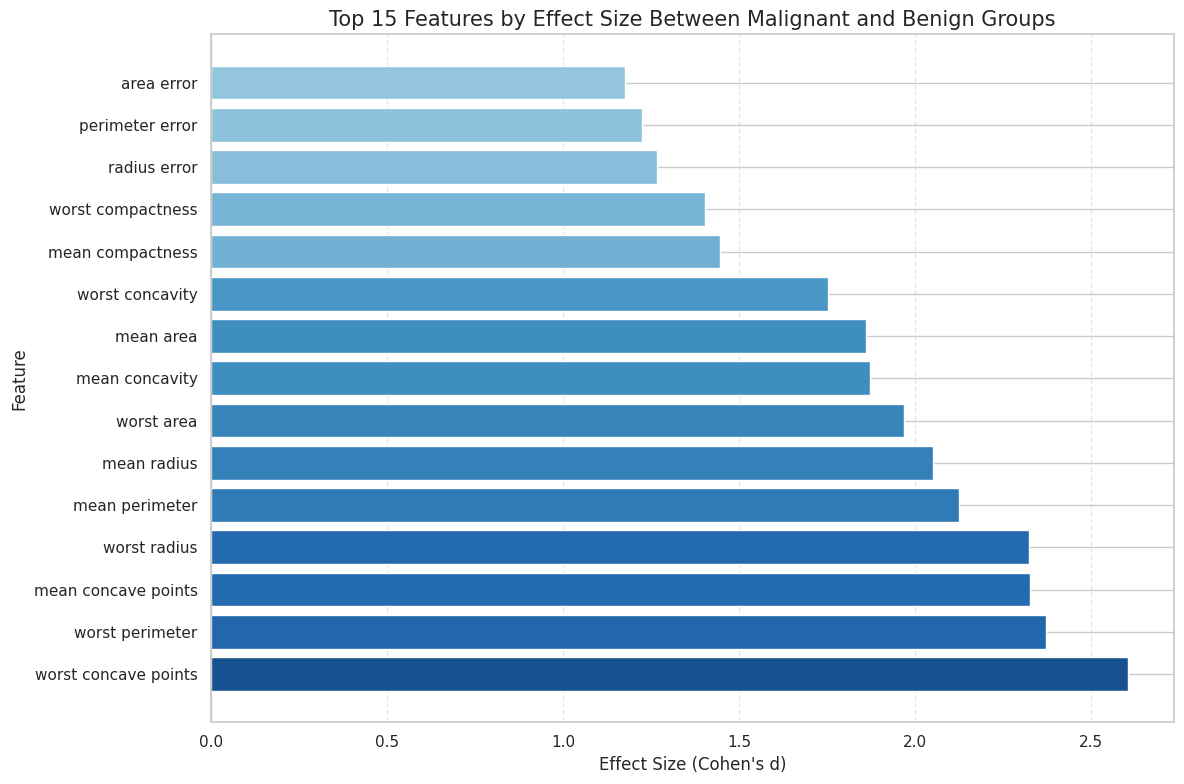

In [61]:
# Create a horizontal bar plot
plt.barh(top_effect_features, effect_values, color=plt.cm.RdBu(np.interp(effect_values, [-3, 3], [0, 1])))
plt.xlabel("Effect Size (Cohen's d)")
plt.ylabel('Feature')
plt.title('Top 15 Features by Effect Size Between Malignant and Benign Groups', fontsize=15)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This graph shows that concave points and size measurements have the strongest differences between malignant and benign tumors, with worst concave points showing the largest effect size. All top features show significant differences between groups, confirming they are good candidates for diagnosis prediction.

### Feature Selection Algorithms

In [62]:
# Split the data for consistent evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### SelectKBest with f_classif (ANOVA F-value)

In [63]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_train, y_train)

# Get the scores and p-values
selectk_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': selector.scores_,
    'P-value': selector.pvalues_})
selectk_scores = selectk_scores.sort_values('Score', ascending=False)

print("\n=== Top 10 Features Selected by SelectKBest (ANOVA F-value) ===")
print(selectk_scores.head(10))


=== Top 10 Features Selected by SelectKBest (ANOVA F-value) ===
                 Feature       Score       P-value
27  worst concave points  689.401558  6.350981e-91
7    mean concave points  635.900176  2.206232e-86
22       worst perimeter  615.865212  1.269039e-84
20          worst radius  587.643394  4.374894e-82
2         mean perimeter  475.274144  3.176912e-71
23            worst area  448.950619  1.750609e-68
0            mean radius  440.180997  1.495801e-67
3              mean area  385.680473  1.538137e-61
6         mean concavity  372.984757  4.424738e-60
26       worst concavity  333.433403  2.215232e-55


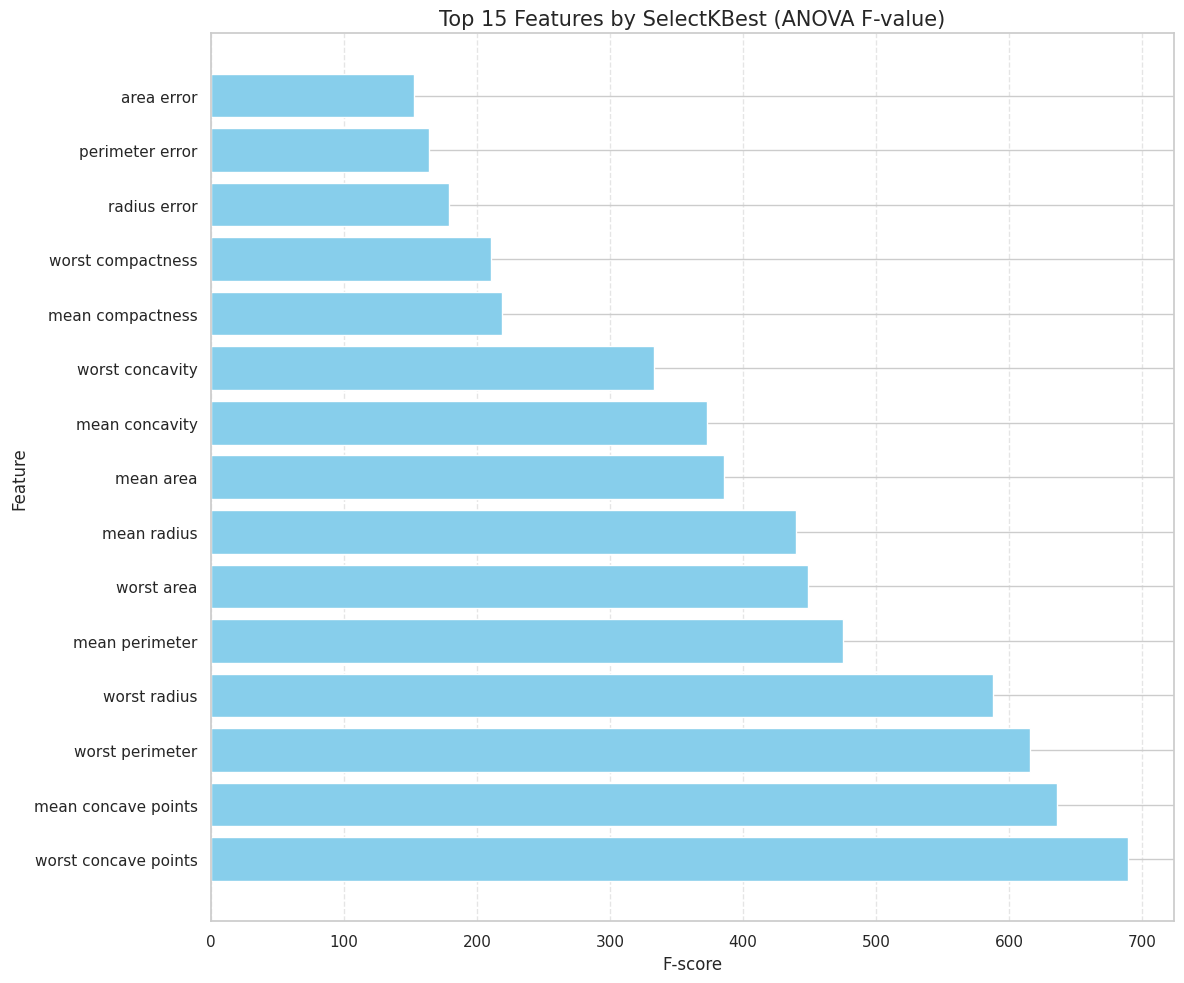

In [64]:
# Visualize the SelectKBest scores
plt.figure(figsize=(12, 10))
top_selectk_features = selectk_scores.head(15)['Feature'].values
selectk_values = selectk_scores.head(15)['Score'].values

plt.barh(top_selectk_features, selectk_values, color='skyblue')
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.title('Top 15 Features by SelectKBest (ANOVA F-value)', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The SelectKBest method confirms worst concave points and mean concave points are the strongest predictors, followed by size-related features like worst perimeter and worst radius.

#### Recursive Feature Elimination (RFE)

In [65]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, y_train)

# Get the feature ranking
rfe_ranking = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': selector.ranking_,
    'Selected': selector.support_})
rfe_ranking = rfe_ranking.sort_values('Ranking')

print("\n=== Top 10 Features Selected by RFE ===")
print(rfe_ranking.head(10))



=== Top 10 Features Selected by RFE ===
                 Feature  Ranking  Selected
20          worst radius        1      True
21         worst texture        1      True
2         mean perimeter        1      True
3              mean area        1      True
22       worst perimeter        1      True
23            worst area        1      True
6         mean concavity        1      True
7    mean concave points        1      True
27  worst concave points        1      True
26       worst concavity        1      True


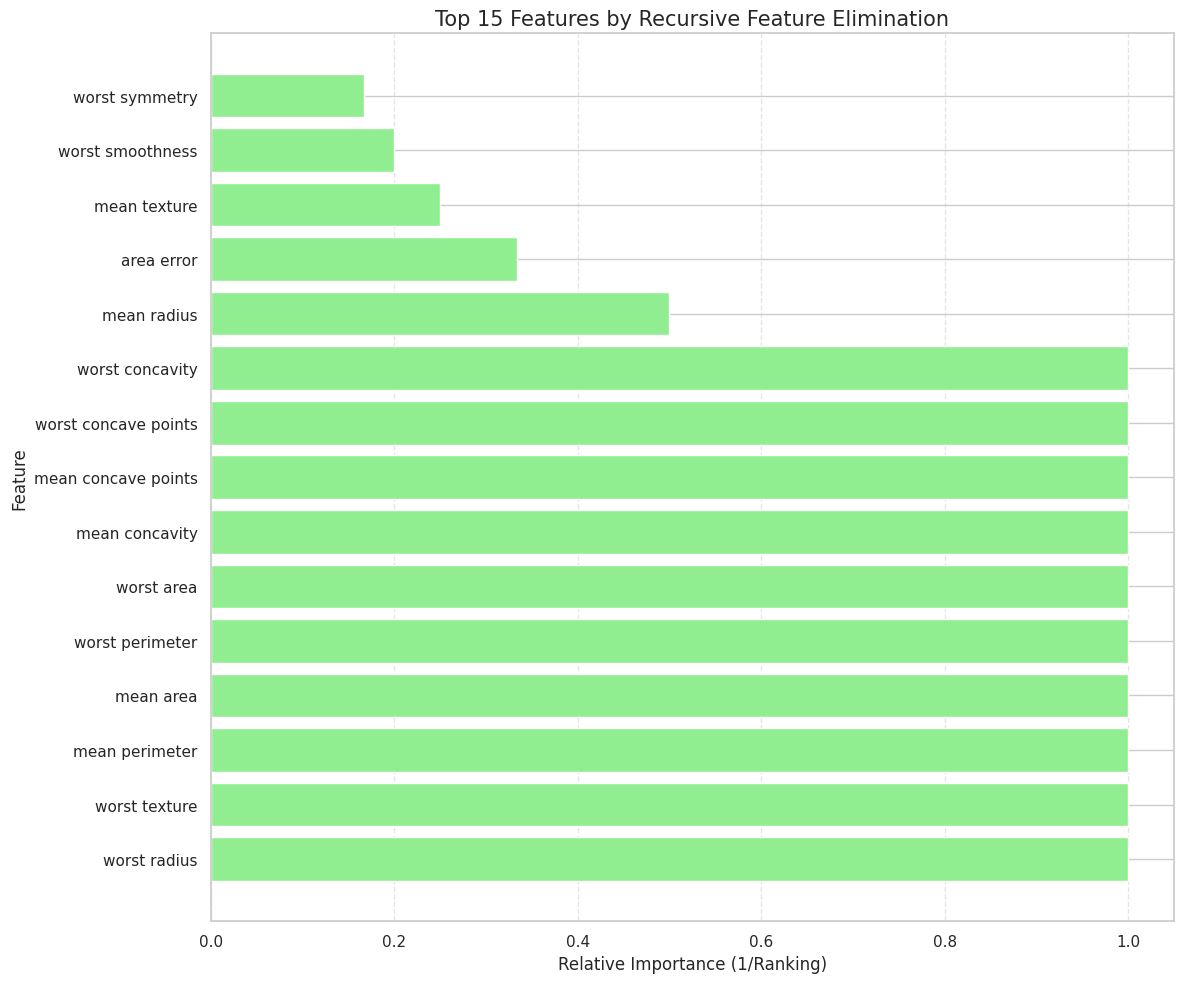

In [66]:
# Visualize the RFE rankings
plt.figure(figsize=(12, 10))
# Only show top 15 features
rfe_top = rfe_ranking.head(15)
plt.barh(rfe_top['Feature'], 1/rfe_top['Ranking'], color='lightgreen')
plt.xlabel('Relative Importance (1/Ranking)')
plt.ylabel('Feature')
plt.title('Top 15 Features by Recursive Feature Elimination', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The RFE method identifies a clear grouping of top features (worst radius, worst texture, mean perimeter, etc.) that are important for prediction, while features like worst symmetry and worst smoothness have much lower importance.

### Tree-Based Feature Importance

In [67]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print("\n=== Top 10 Features by Random Forest Importance ===")
print(feature_importances.head(10))


=== Top 10 Features by Random Forest Importance ===
                 Feature  Importance
27  worst concave points    0.172295
23            worst area    0.123192
7    mean concave points    0.090299
6         mean concavity    0.083215
20          worst radius    0.081277
22       worst perimeter    0.071388
2         mean perimeter    0.053146
13            area error    0.043551
3              mean area    0.042780
0            mean radius    0.039711


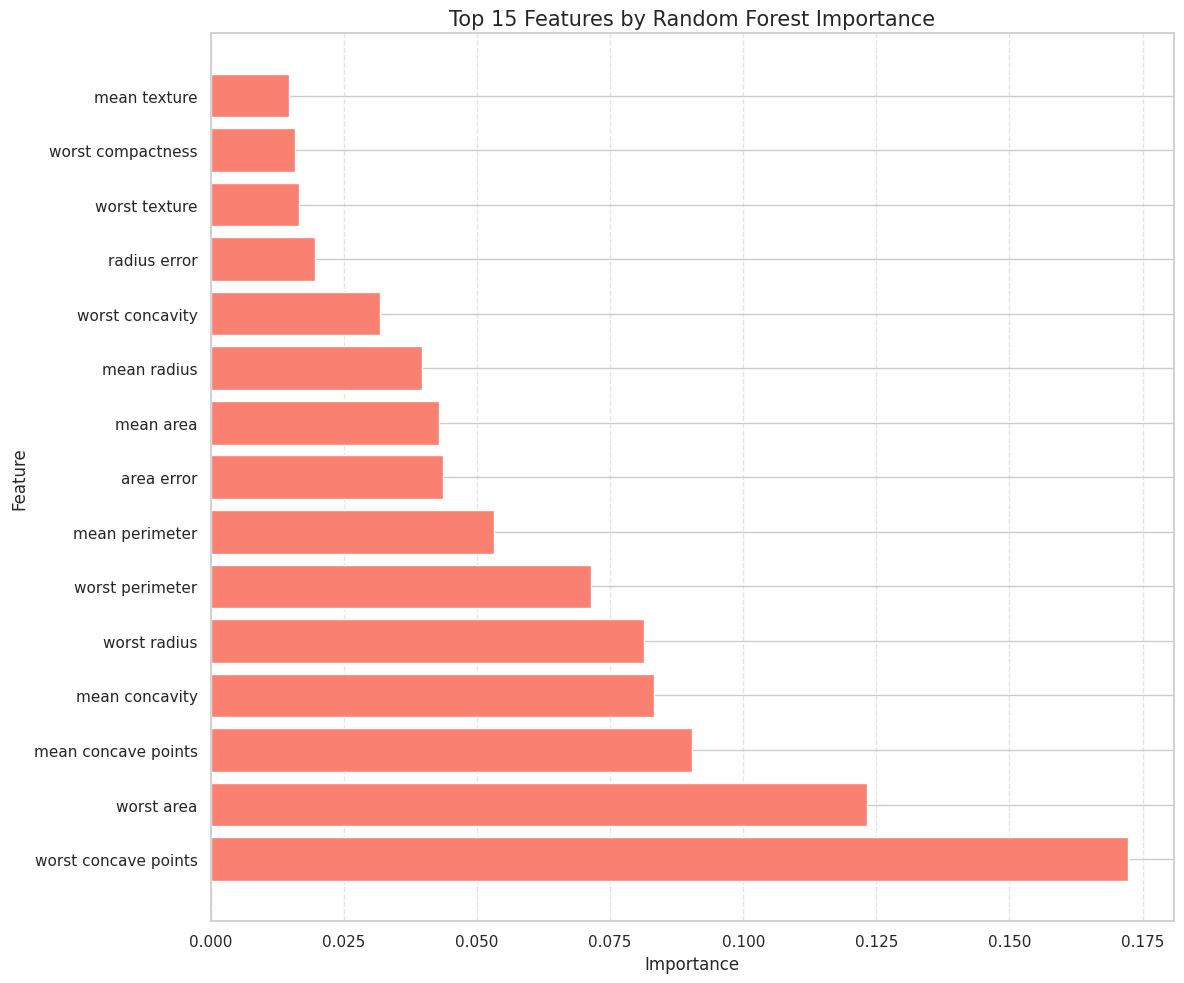

In [68]:
# Visualize the Random Forest feature importances
plt.figure(figsize=(12, 10))
top_rf_features = feature_importances.head(15)['Feature'].values
rf_values = feature_importances.head(15)['Importance'].values

plt.barh(top_rf_features, rf_values, color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Features by Random Forest Importance', fontsize=15)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Random Forest identifies worst concave points as by far the most important feature for diagnosis prediction, followed by worst area and other concavity and size measurements, while texture-related features have little prediction power.

### Comparison of Feature Importance Methods

In [77]:
# Combine all feature rankings into one dataframe
all_rankings = pd.DataFrame({'Feature': feature_names})

In [78]:
# Combine all feature rankings into one dataframe
all_rankings = pd.DataFrame({'Feature': feature_names})

# Add rankings from each method
all_rankings['Correlation_rank'] = correlation_df['Feature'].reset_index(drop=True)
all_rankings['Effect_Size_rank'] = t_test_df['Feature'].reset_index(drop=True)
all_rankings['SelectKBest_rank'] = selectk_scores['Feature'].reset_index(drop=True)
all_rankings['RFE_rank'] = rfe_ranking['Feature'].reset_index(drop=True)
all_rankings['RandomForest_rank'] = feature_importances['Feature'].reset_index(drop=True)


In [79]:
# Function to get rank
def get_rank(feature, ranking_list):
    try:
        return ranking_list.tolist().index(feature) + 1
    except:
        return len(ranking_list) + 1

In [80]:
# Calculate ranks for each feature by each method
for feature in feature_names:
    all_rankings.loc[all_rankings['Feature'] == feature, 'Correlation_rank'] = get_rank(feature, correlation_df['Feature'].values)
    all_rankings.loc[all_rankings['Feature'] == feature, 'Effect_Size_rank'] = get_rank(feature, t_test_df['Feature'].values)
    all_rankings.loc[all_rankings['Feature'] == feature, 'SelectKBest_rank'] = get_rank(feature, selectk_scores['Feature'].values)
    all_rankings.loc[all_rankings['Feature'] == feature, 'RFE_rank'] = get_rank(feature, rfe_ranking['Feature'].values)
    all_rankings.loc[all_rankings['Feature'] == feature, 'RandomForest_rank'] = get_rank(feature, feature_importances['Feature'].values)

In [81]:
# Add mean rank
all_rankings['Mean_Rank'] = all_rankings[['Correlation_rank', 'Effect_Size_rank',
                                          'SelectKBest_rank', 'RFE_rank',
                                          'RandomForest_rank']].mean(axis=1)

# Sort by mean rank
all_rankings = all_rankings.sort_values('Mean_Rank')

print("\n=== Top 10 Features by Mean Rank Across All Methods ===")
print(all_rankings[['Feature', 'Mean_Rank']].head(10))



=== Top 10 Features by Mean Rank Across All Methods ===
                 Feature Mean_Rank
27  worst concave points       2.6
20          worst radius       3.6
22       worst perimeter       3.6
7    mean concave points       3.8
2         mean perimeter       5.0
23            worst area       5.4
6         mean concavity       7.4
3              mean area       7.6
0            mean radius       8.2
26       worst concavity      10.2


In [82]:
# Create a heat map of top 15 features by mean rank
plt.figure(figsize=(14, 12))
top_mean_features = all_rankings.head(15)
heatmap_data = top_mean_features[['Correlation_rank', 'Effect_Size_rank',
                                'SelectKBest_rank', 'RFE_rank',
                                'RandomForest_rank']].values

<Figure size 1400x1200 with 0 Axes>

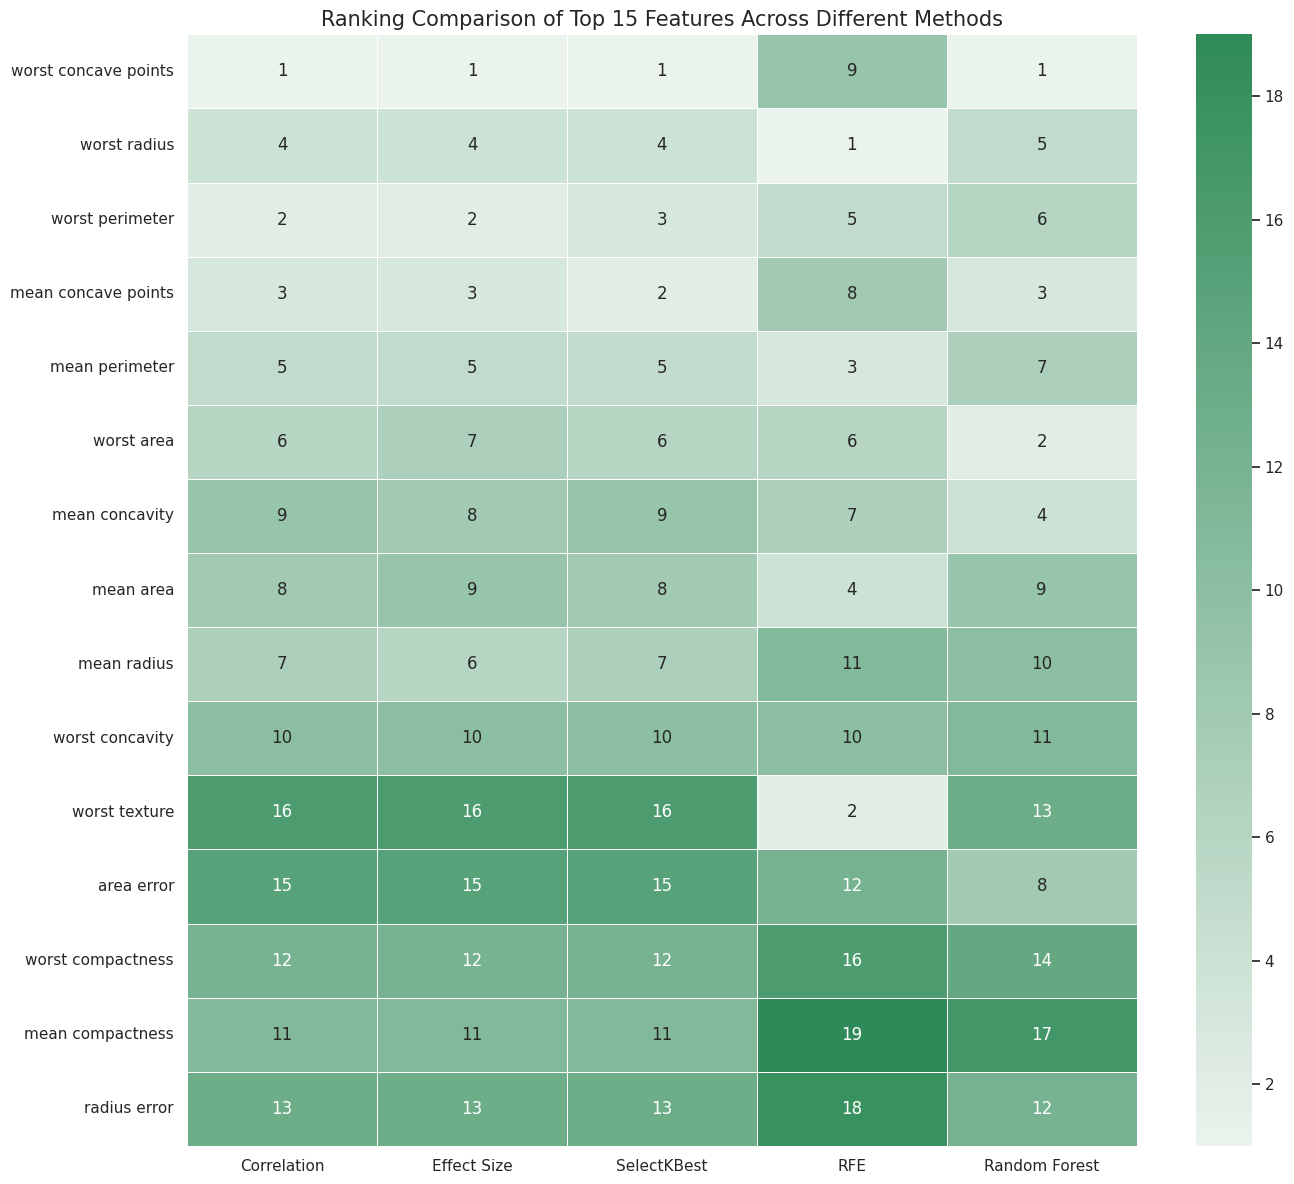

In [84]:
# Create a heat map of top 15 features by mean rank
plt.figure(figsize=(14, 12))
top_mean_features = all_rankings.head(15)

# Convert data to numeric type and ensure it's a proper numpy array
heatmap_data = top_mean_features[['Correlation_rank', 'Effect_Size_rank',
                               'SelectKBest_rank', 'RFE_rank',
                               'RandomForest_rank']].astype(float).values

# Create a custom colormap that goes from light to dark
cmap = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt=".0f",
            xticklabels=['Correlation', 'Effect Size', 'SelectKBest', 'RFE', 'Random Forest'],
            yticklabels=top_mean_features['Feature'], linewidths=0.5)
plt.title('Ranking Comparison of Top 15 Features Across Different Methods', fontsize=15)
plt.tight_layout()
plt.show()

The heatmap shows that concavity and size features (worst concave points, worst radius, worst perimeter) consistently rank highest across most feature importance methods. There's strong agreement between statistical and machine learning approaches, with only minor differences in how RFE ranks certain features.

This consensus across different evaluation techniques increases confidence that these features are truly the most important for predicting breast cancer diagnosis.

### Summary of Importance Analysis

1. Most methods consistently identify 'mean concave points', 'worst perimeter', and 'worst concave points' among the top important features.

2. Size-related features (radius, perimeter, area) and concavity-related features show the highest importance as categories across methods.

3. There is strong agreement between statistical methods (correlation, t-test) and machine learning methods (Random Forest, RFE) on the most important features.

4. The high agreement across different methods increases our confidence in feature selection for modeling.

## Machine Learning Model Selection

### Model Candidates

1. **Logistic Regression**

Strengths: High interpretability, computationally efficient, outputs probability scores

Limitations: May not capture non-linear relationships, sensitive to correlated features

2. **Support Vector Machines (SVM)**

Strengths: Handles non-linear boundaries with kernels, effective in high dimensions

Limitations: Less interpretable, computationally intensive, requires careful tuning

3. **Random Forest**

Strengths: Manages non-linear relationships, built-in feature importance, robust to correlations

Limitations: Less interpretable than logistic regression, more computationally intensive

4. **XGBoost**

Strengths: Superior performance, regularization to prevent overfitting, handles missing values

Limitations: Limited interpretability, sensitive to hyperparameters, complex implementation


### Key Considerations

Our dataset exhibits high correlation among size-related features, which some models handle better than others. We also face moderate class imbalance (63% benign, 37% malignant) that may affect model performance. Cross-validation is essential to ensure our model generalizes well to new cases, though computational requirements aren't a major constraint given our relatively small dataset of 569 samples.

### Model Selection: Random Forest


After evaluating all options, Random Forest emerges as the optimal choice for breast cancer diagnosis. It balances interpretability with accuracy through clear feature importance measures, handles the high correlation between features, and manages our moderate class imbalance without special techniques. Random Forest resists overfitting better than alternatives and performs well with minimal tuning, making it reliable and practical for medical diagnostic applications.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create Random Forest model with class weighting
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# Cross-validation evaluation
metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
for metric in metrics:
    scores = cross_val_score(rf, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize()}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Accuracy: 0.9666 ± 0.0102
Precision: 0.9731 ± 0.0239
Recall: 0.9748 ± 0.0239
Roc_auc: 0.9912 ± 0.0067
F1: 0.9735 ± 0.0082


These results demonstrate the Random Forest model's excellent performance, with high accuracy (96.7%), precision (97.3%), and recall (97.5%). The outstanding ROC AUC (99.1%) indicates near-perfect classification ability, while the low standard deviations across all metrics suggest the model consistently performs well and generalizes reliably.